In [1]:
from datlib.plots import *
from datlib.FRED import *

In [2]:
data_codes  = {"GDP": "GDP",
               "Real GDP": "GDPC1"}

start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()

data = gather_data(data_codes = data_codes, start = start, end = end, freq = "Q")

In [3]:
data

,GDP,Real GDP
DATE,,
2002-03-31,10783.500,13394.910
2002-06-30,10887.460,13477.356
2002-09-30,10984.040,13531.741
2002-12-31,11061.433,13549.421
2003-03-31,11174.129,13619.434
...,...,...
2020-06-30,19477.444,17258.205
2020-09-30,21138.574,18560.774
2020-12-31,21477.597,18767.778


In [4]:
def plot_lines(df, linewidth = 1, figsize = (40,20),secondary_y = None, legend=True, pp = None, save_fig = False):
    
    fig, ax = plt.subplots(figsize = figsize)    

    df.dropna(axis = 0, how = "all").plot.line(linewidth = linewidth, ax = ax, secondary_y=secondary_y, legend = legend)
    ax.tick_params(axis='x', rotation=90)
    ax.tick_params('both', length=0, which='both')
    vals = ax.get_yticks()
    ax.set_yticklabels([round(x,2) for x in vals]) 
    
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")  
    if save_fig:
        try:
            os.mkdir("plots")
        except:
            pass
        plt.savefig("plots/" + filename[:50] + " line.png", 
                bbox_inches = "tight")
    if pp != None: pp.savefig(fig, bbox_inches = "tight")

<ipython-input-4-8d66cf66d768>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


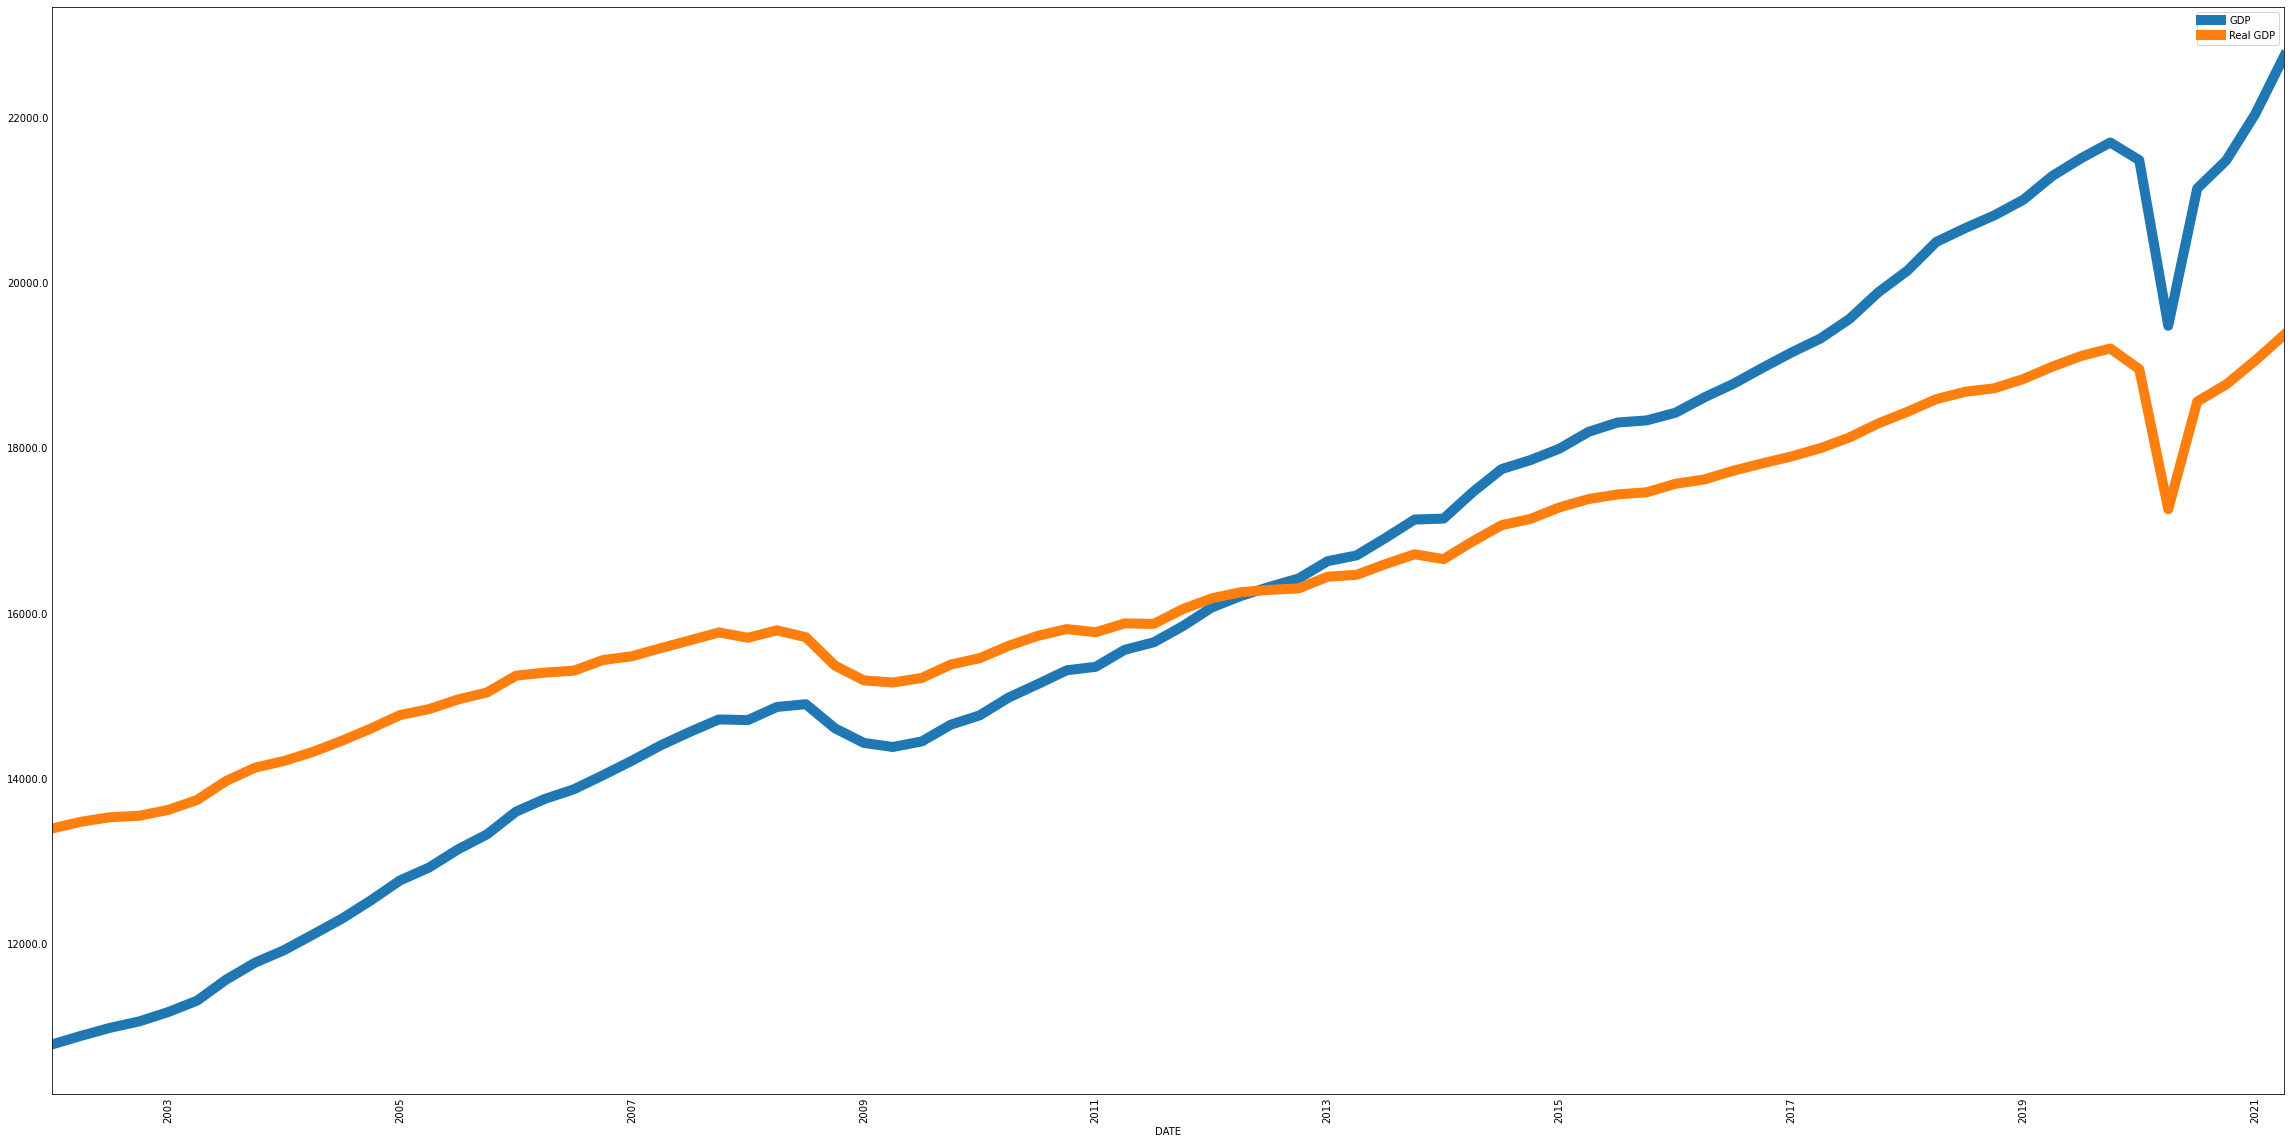

In [5]:
plot_lines(df = data, linewidth = 10, figsize = (40, 20), pp = None)

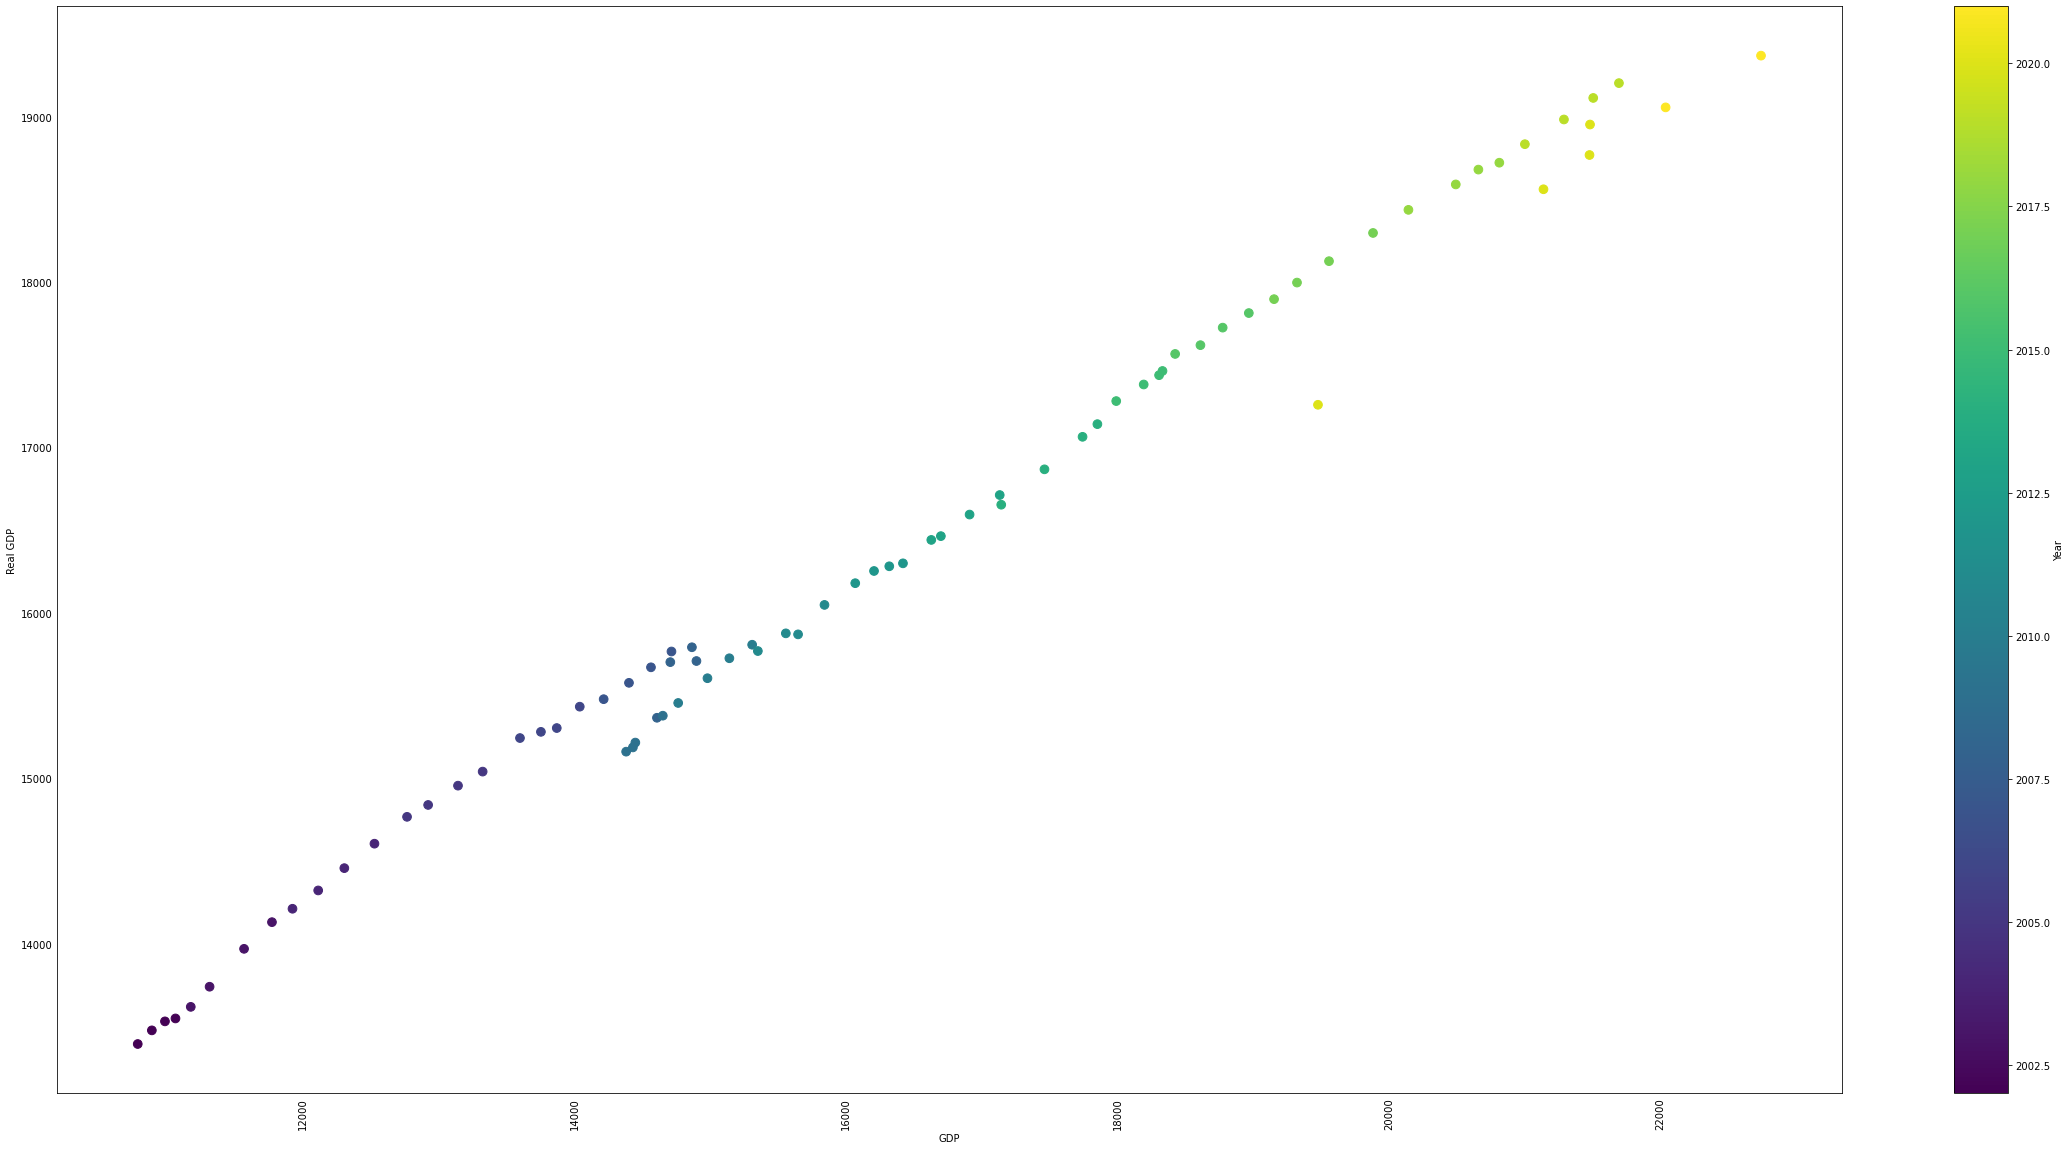

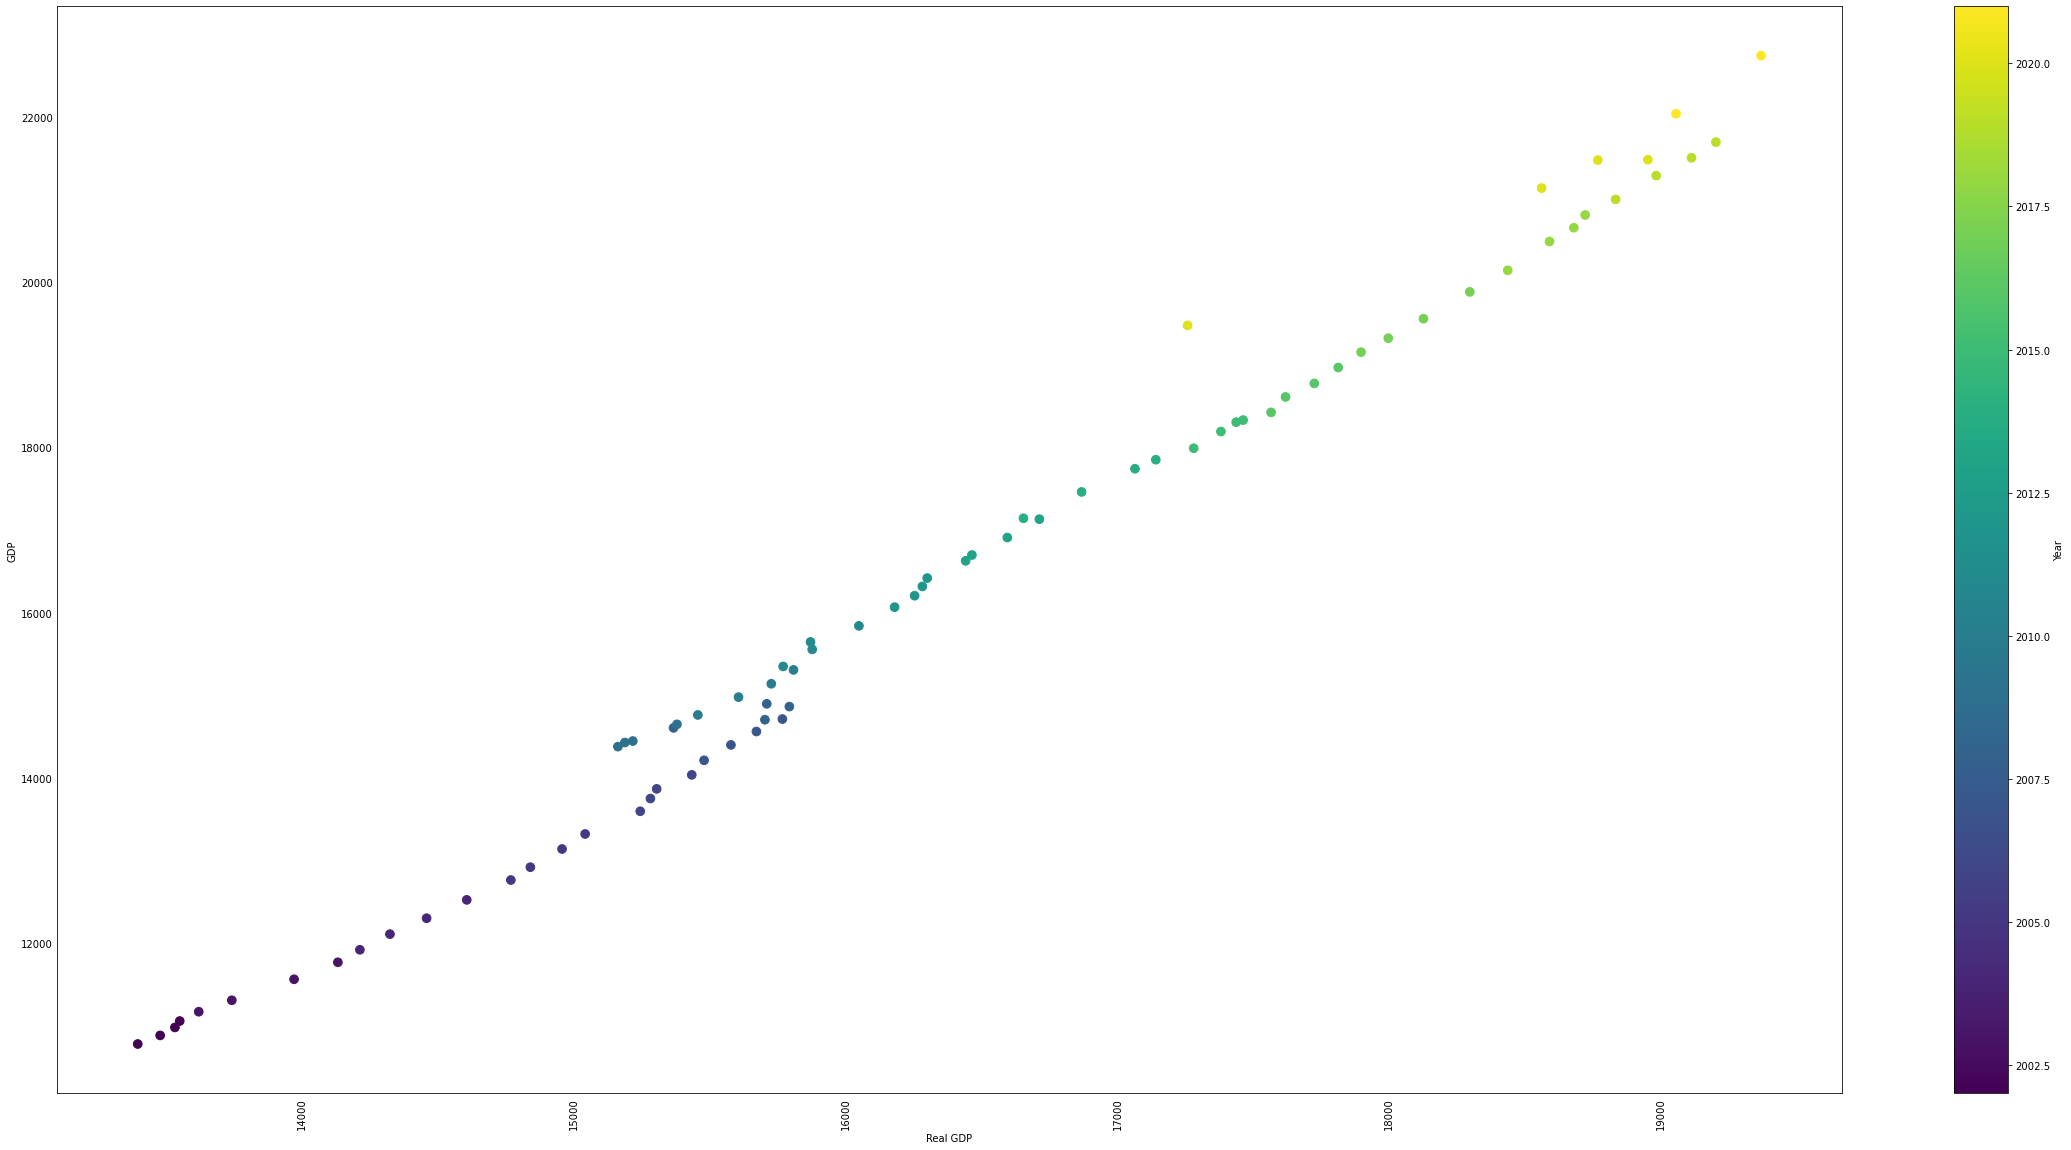

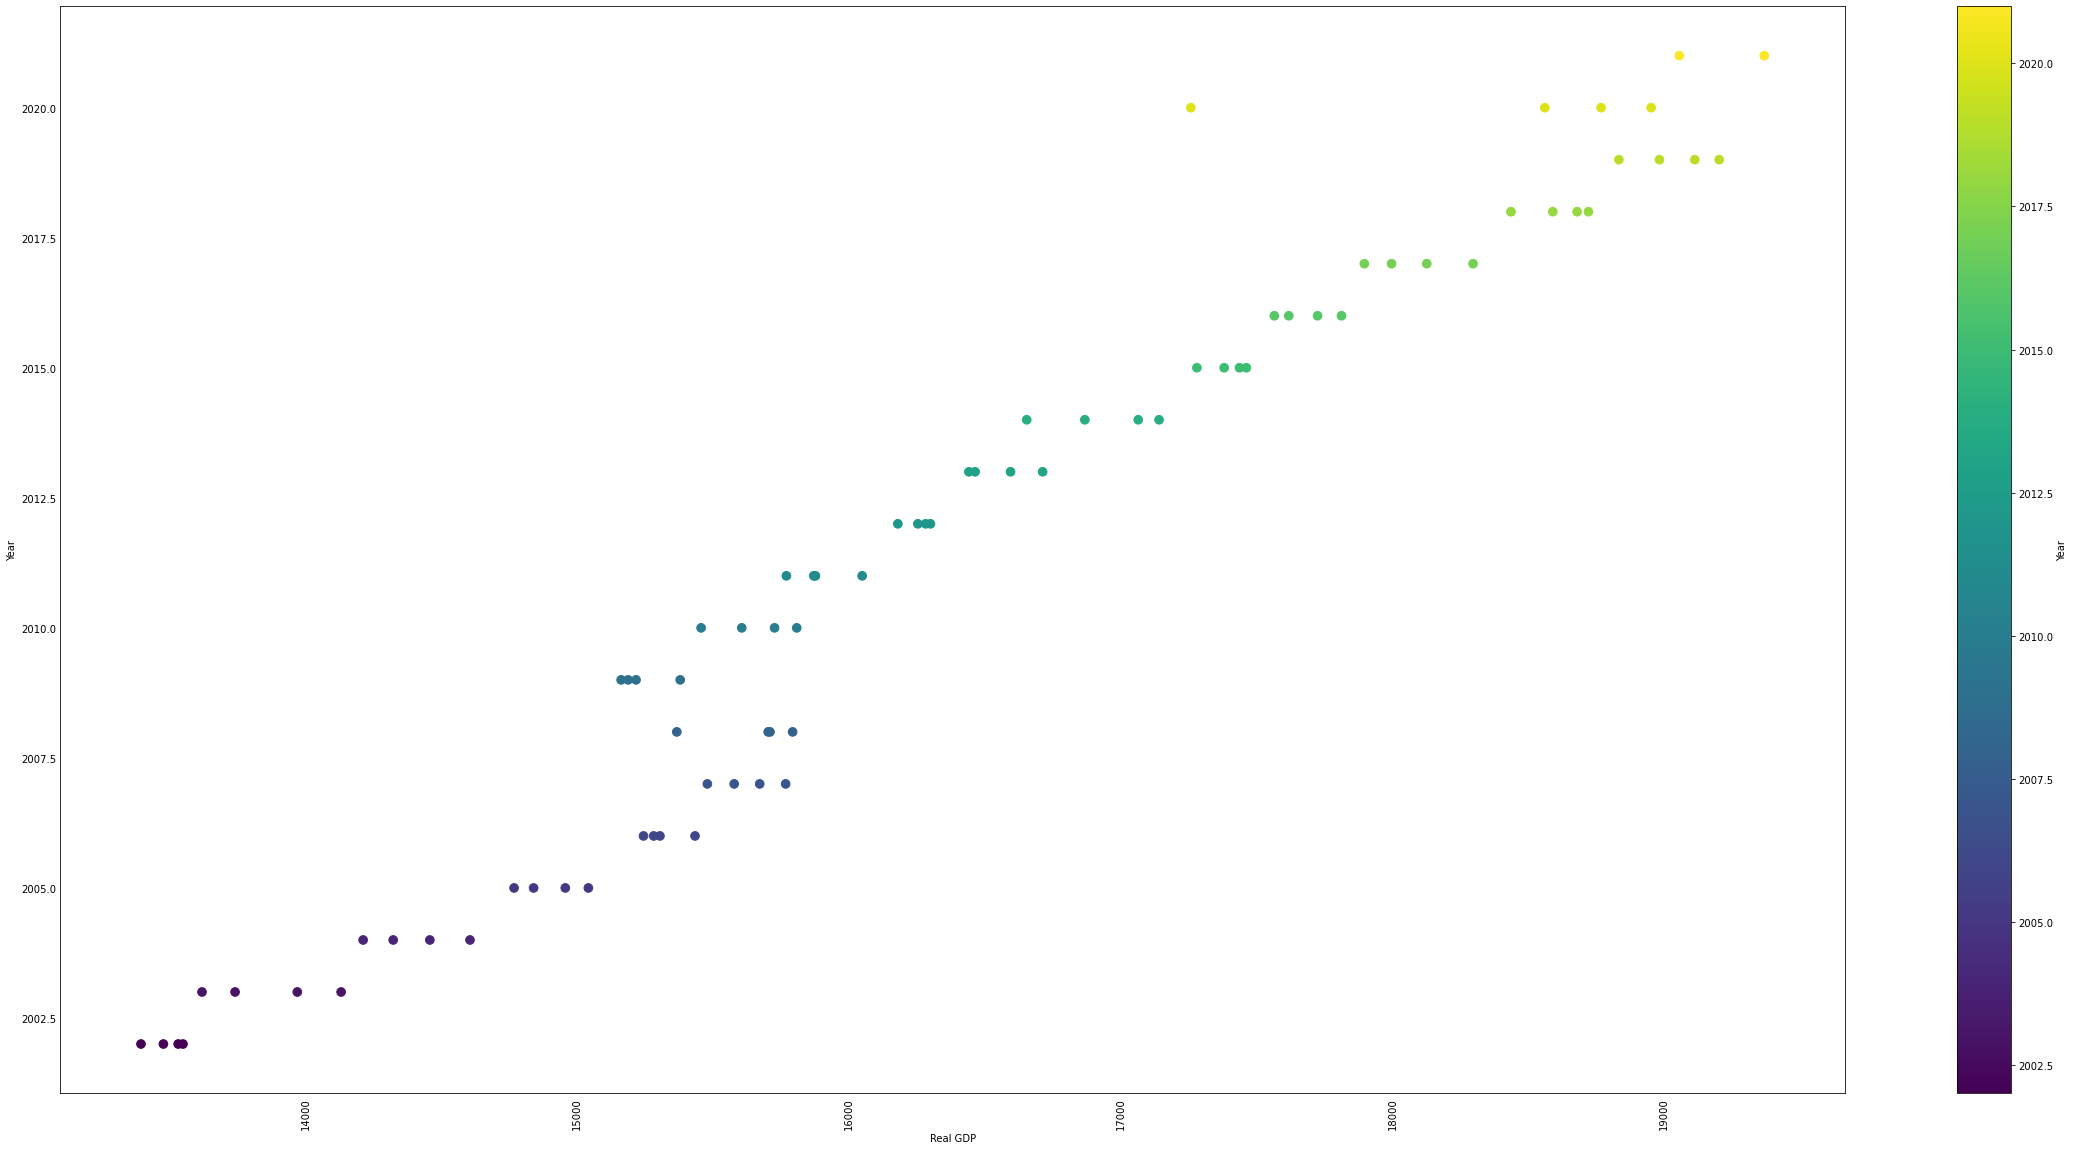

In [6]:
def plot_ts_scatter(data, s = 75, figsize = (40, 20), save_fig = False, pp = None):
    df = data.copy()
    for var1 in df:
        for var2 in df:
            if var1 != var2:
                fig, ax = plt.subplots(figsize = figsize)
                if "Year" not in df.keys():
                    df["Year"] = [int(str(ind)[:4]) for ind in df.index] 
                df.plot.scatter(x = var1, y = var2, s = s, ax = ax, 
                                c = "Year", cmap = "viridis")
                ax.tick_params(axis='x', rotation=90)
                ax.tick_params('both', length=0, which='both')
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    plt.savefig("plots/" + str(list(df.keys())).replace("[", "").replace("]","")[:40] + " scatter.png",
                            bbox_inches = "tight")
                    if pp != None: pp.savefig(fig, bbox_inches = "tight")

plot_ts_scatter(data[data_codes])

<ipython-input-4-8d66cf66d768>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


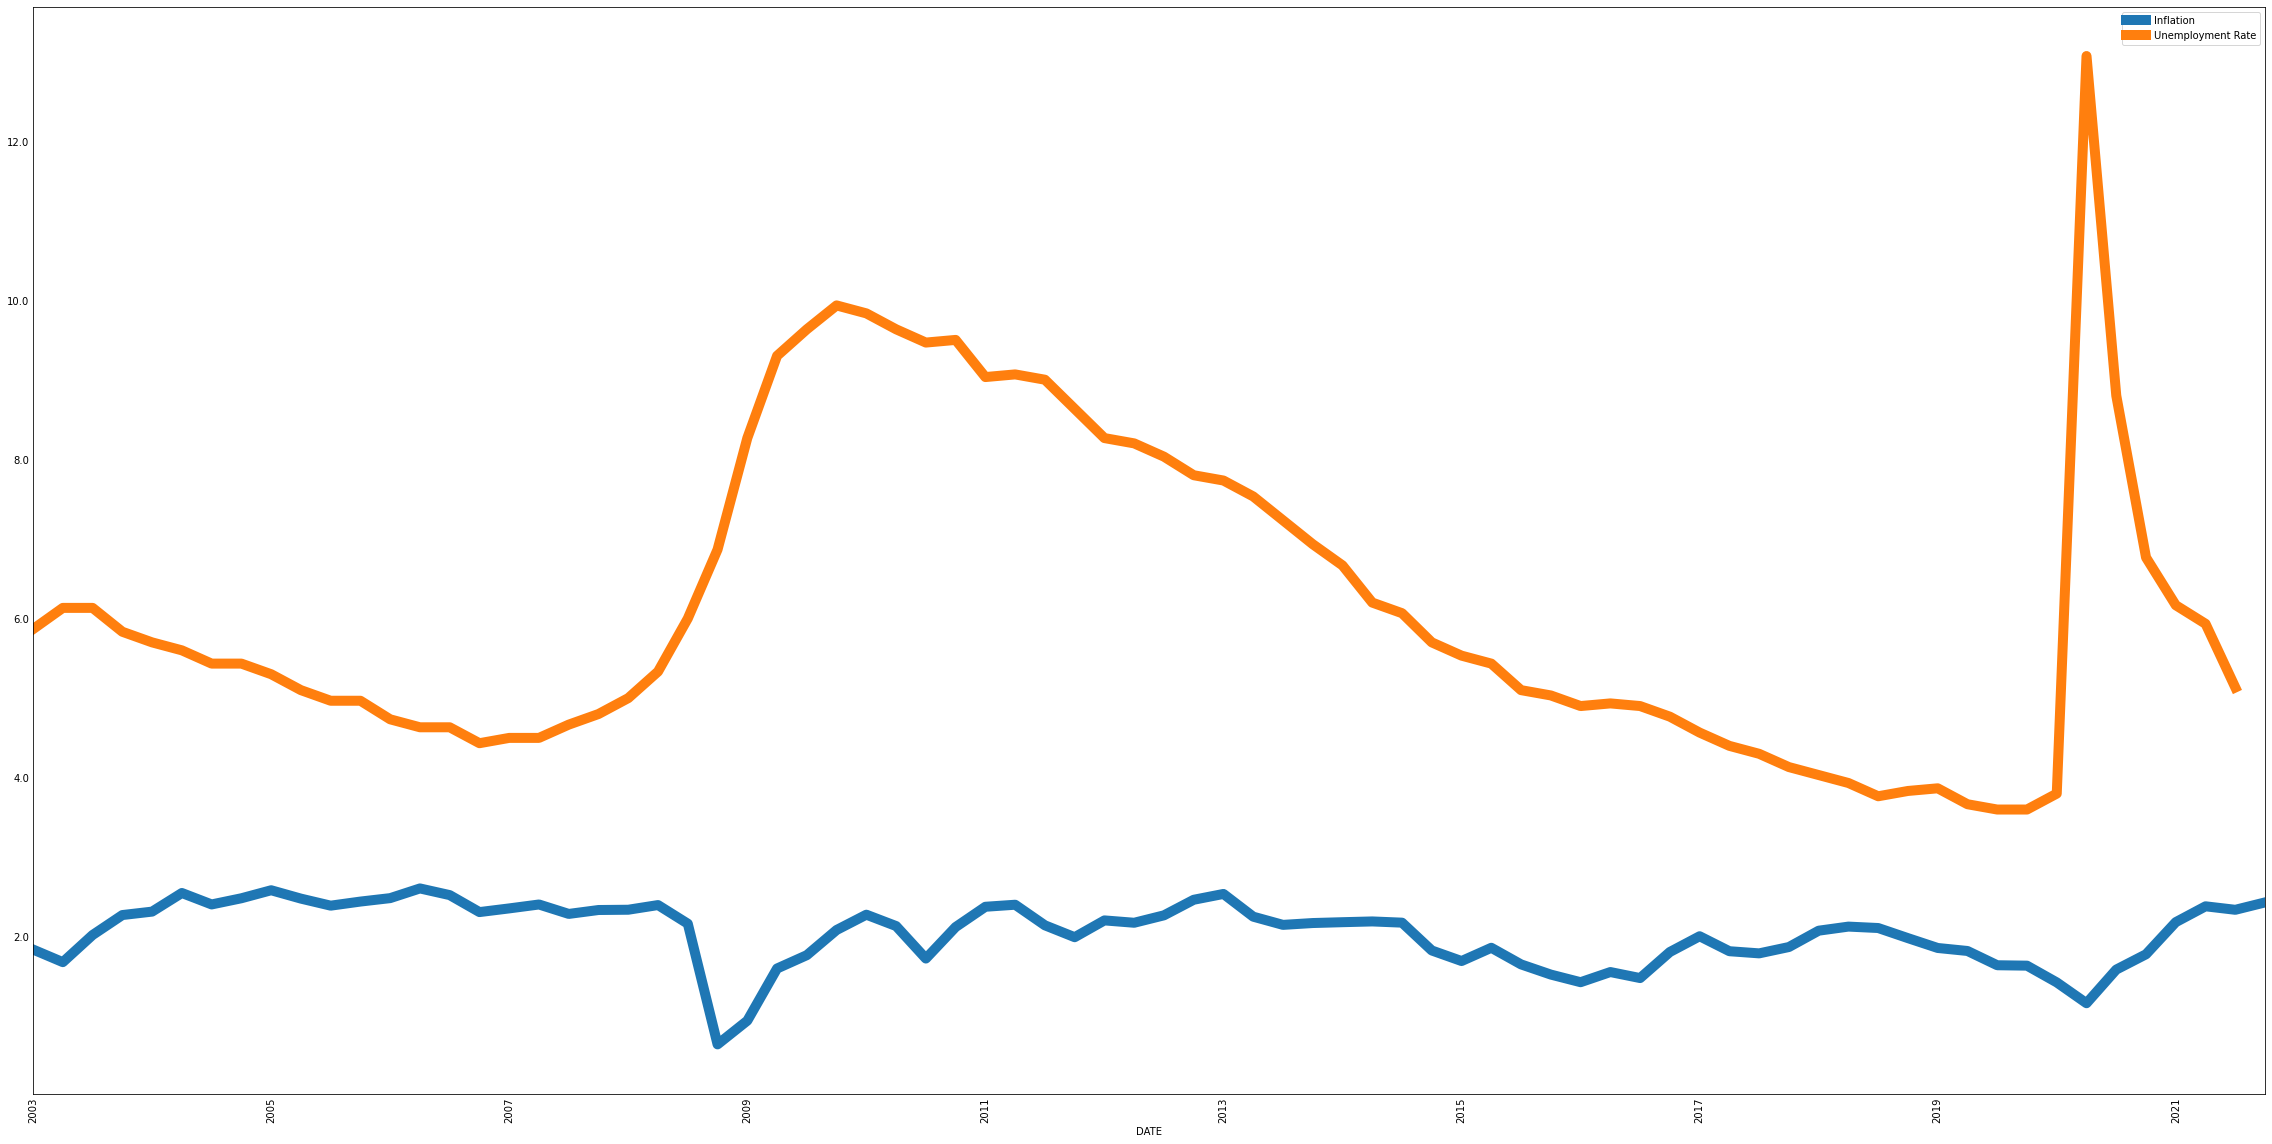

In [7]:
data_codes = {"Inflation":"T10YIE",
              "Unemployment Rate":"UNRATE"}
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "Q")
plot_lines(df = data, linewidth = 10, figsize = (40, 20), pp = None)

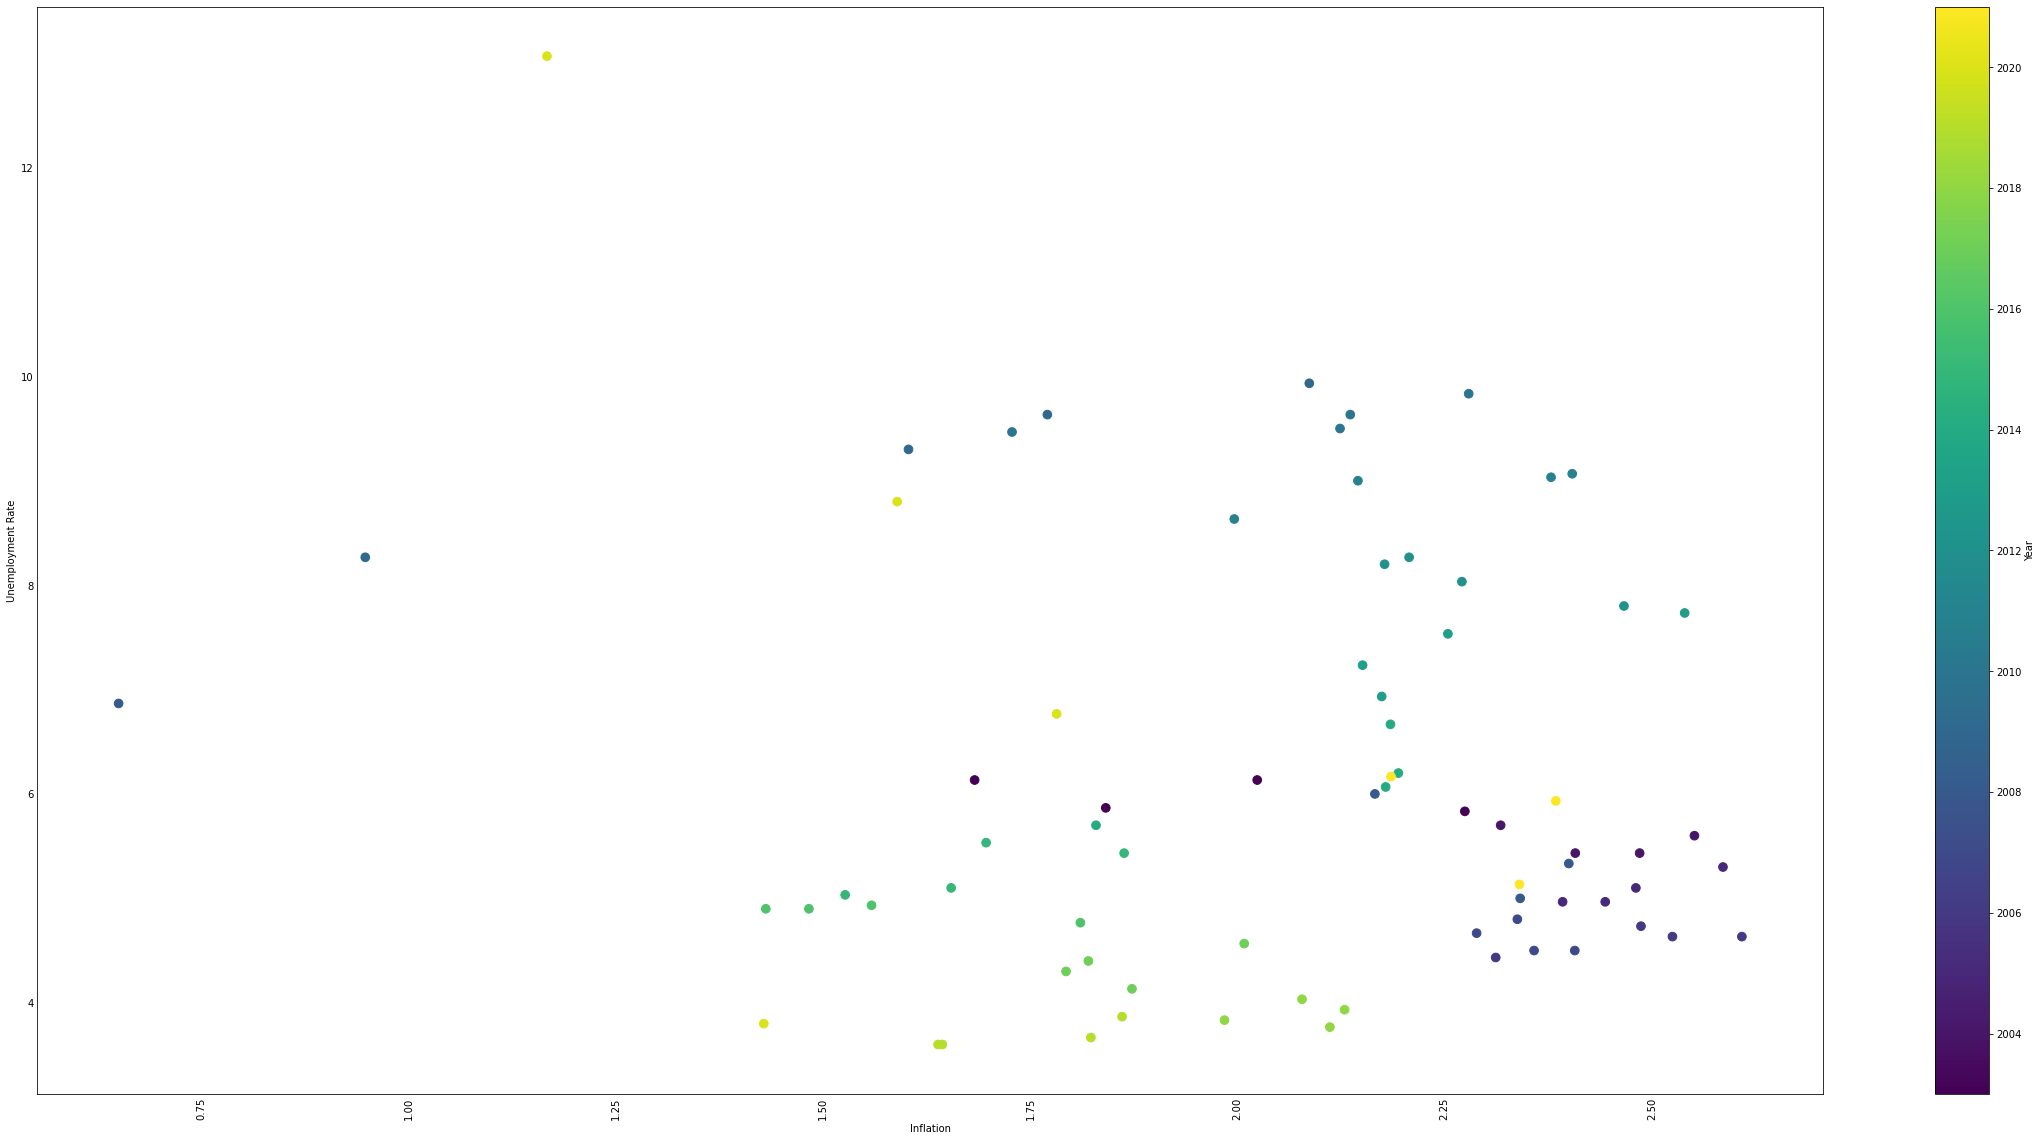

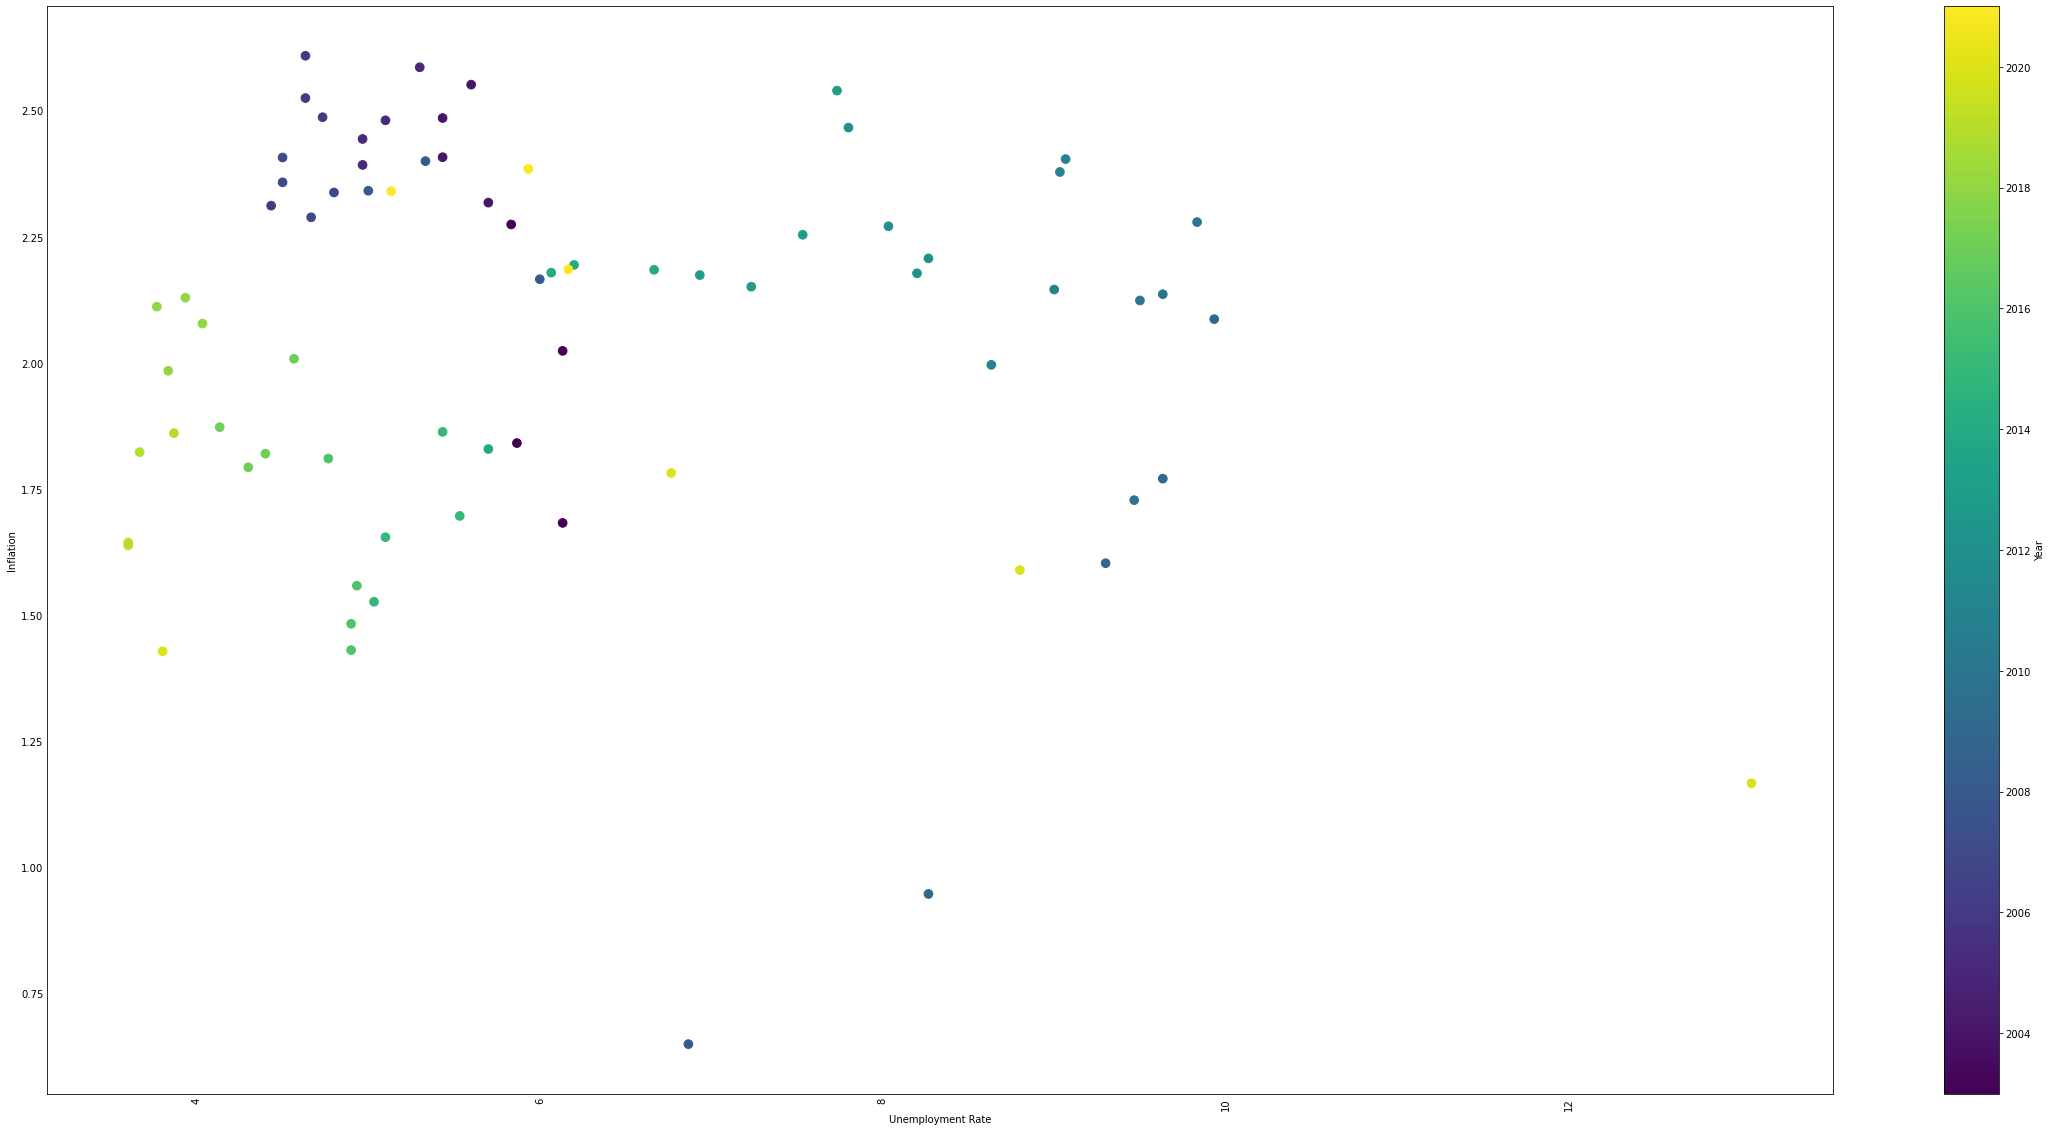

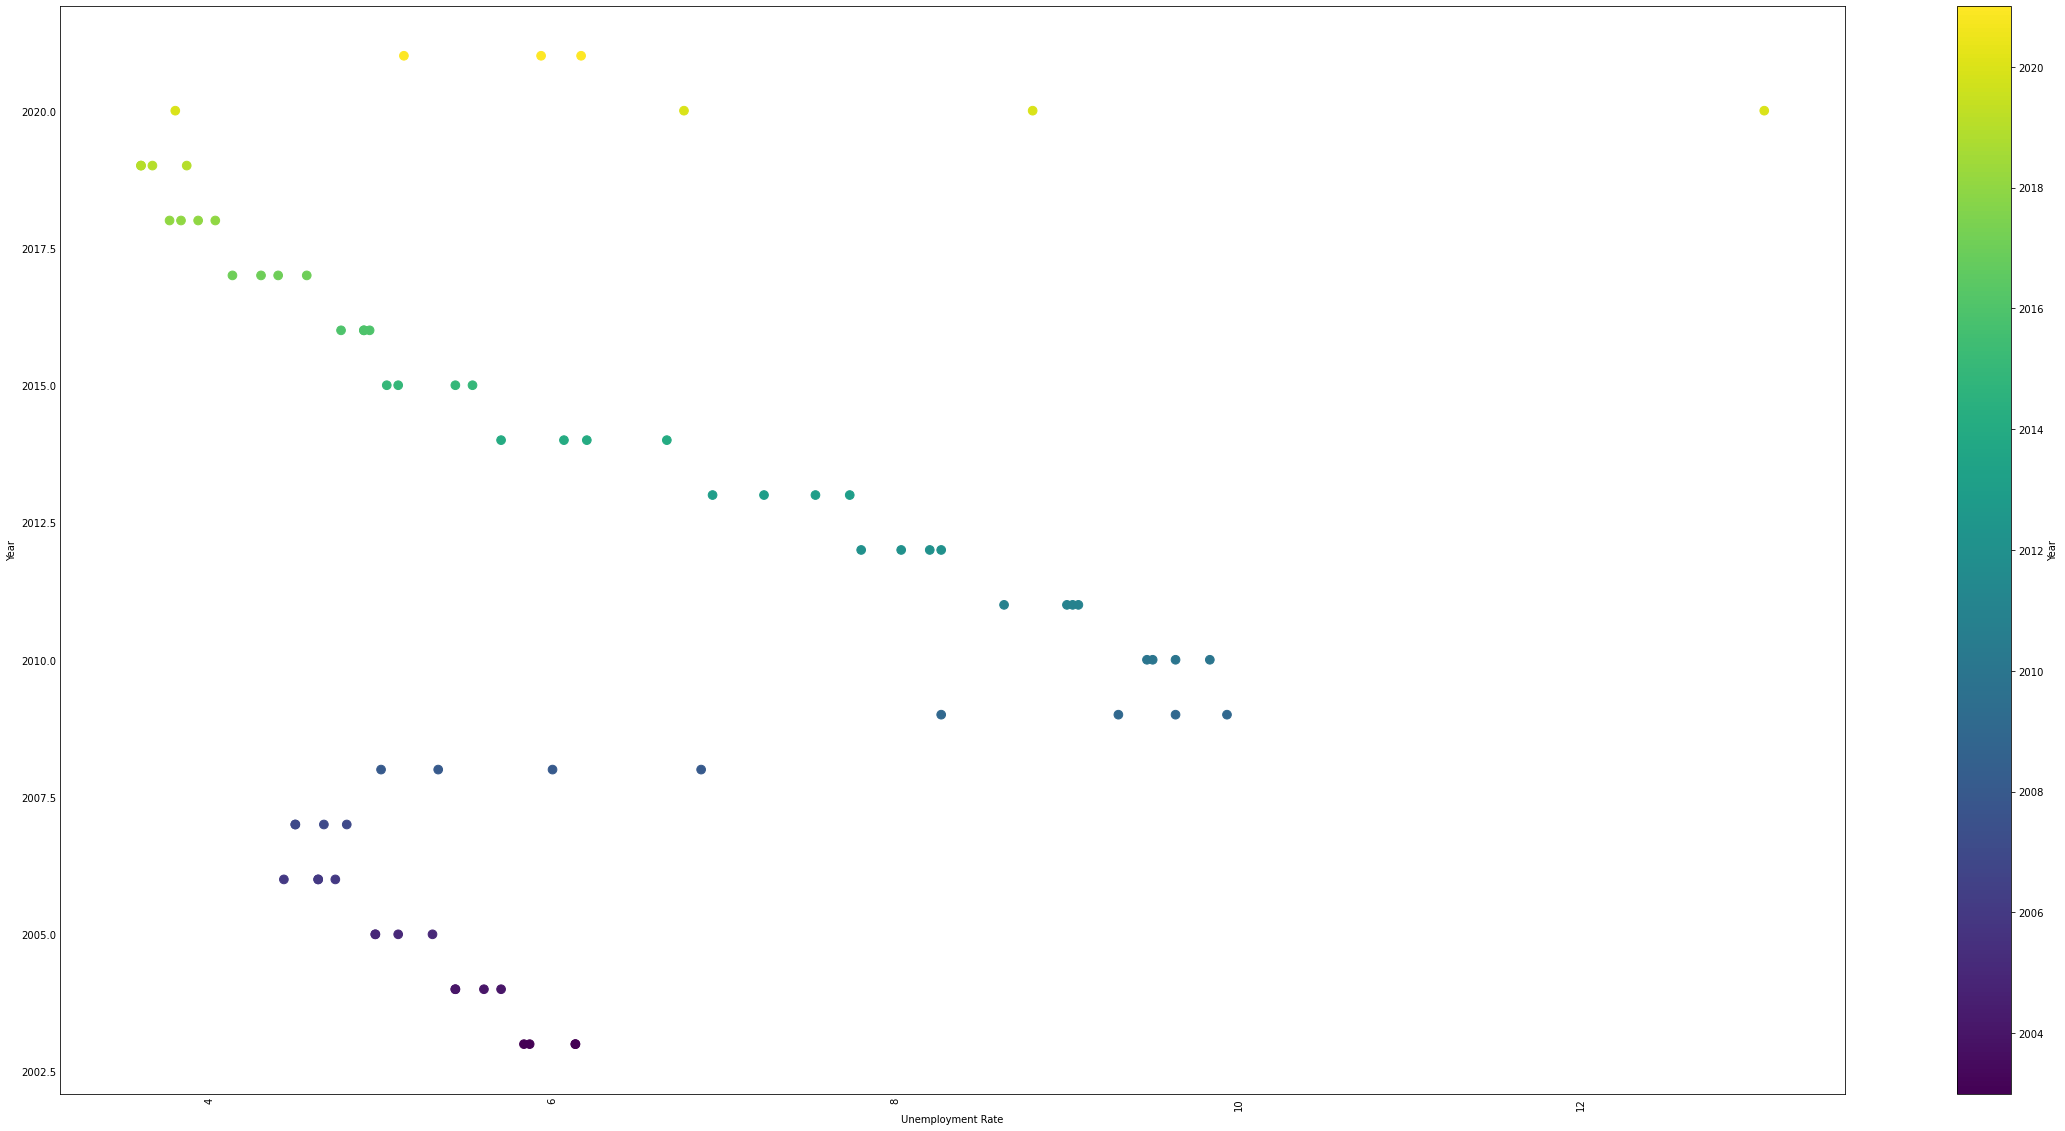

In [8]:
plot_ts_scatter(data[data_codes])

<ipython-input-4-8d66cf66d768>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


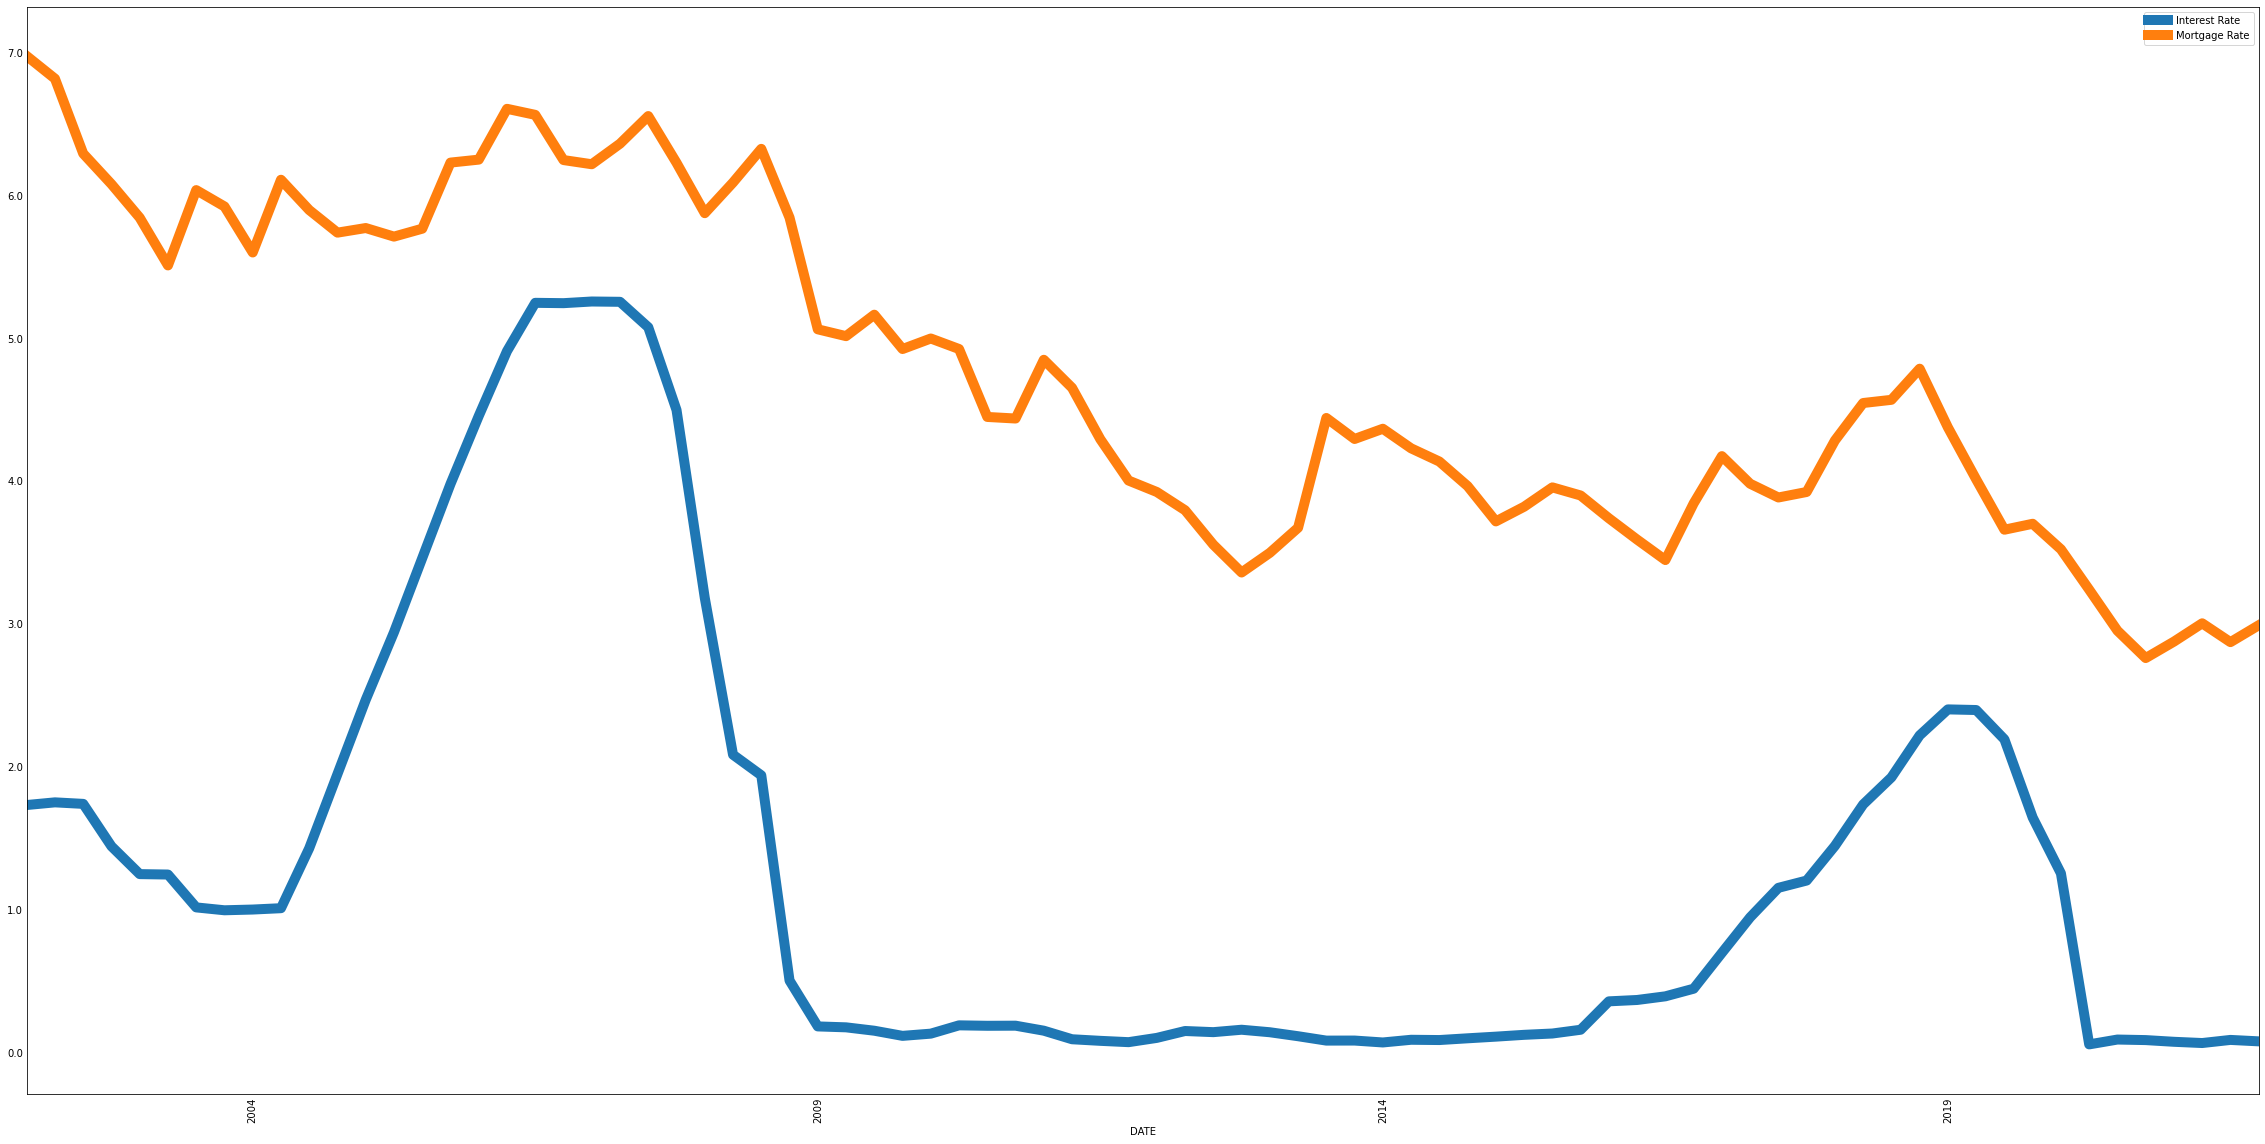

In [10]:
data_codes = {"Interest Rate":"DFF",
              "Mortgage Rate":"MORTGAGE30US"}
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "Q")
plot_lines(df = data, linewidth = 10, figsize = (40, 20), pp = None)